In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
import pickle

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
dta = sm.datasets.fair.load_pandas().data
dta

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
dta['affair'] = (dta['affairs'] > 0).astype(int)
dta.head(20)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [4]:
dta['affair'].value_counts()

0    4313
1    2053
Name: affair, dtype: int64

In [5]:
dta['occupation'].value_counts()

3.0    2783
4.0    1834
2.0     859
5.0     740
6.0     109
1.0      41
Name: occupation, dtype: int64

In [6]:
dta['occupation_husb'].value_counts()

4.0    2030
5.0    1779
2.0    1308
6.0     530
3.0     490
1.0     229
Name: occupation_husb, dtype: int64

In [7]:
y,X = dmatrices('affair~rate_marriage+age+yrs_married+children+religious+educ+C(occupation)+C(occupation_husb)',dta,return_type="dataframe")

In [8]:
X

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,32.0,13.0,2.0,3.0,17.0
6362,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,32.0,13.0,1.0,1.0,16.0
6363,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,22.0,2.5,0.0,2.0,14.0
6364,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,32.0,6.0,1.0,3.0,14.0


In [9]:
y

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
6361,0.0
6362,0.0
6363,0.0
6364,0.0


In [10]:
y.value_counts()

affair
0.0       4313
1.0       2053
dtype: int64

In [11]:
y = np.ravel(y)
y

array([1., 1., 1., ..., 0., 0., 0.])

In [12]:
len(y)

6366

In [13]:
len(X.columns)

17

In [14]:
X = X.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                      'C(occupation)[T.3.0]':'occ_3',
                      'C(occupation)[T.4.0]':'occ_4',
                      'C(occupation)[T.5.0]':'occ_5',
                      'C(occupation)[T.6.0]':'occ_6',
                      'C(occupation_husb)[T.2.0]':'occ_husb_2',
                      'C(occupation_husb)[T.3.0]':'occ_husb_3',
                      'C(occupation_husb)[T.4.0]':'occ_husb_4',
                      'C(occupation_husb)[T.5.0]':'occ_husb_5',
                      'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [15]:
X.head(25)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,27.0,9.0,0.0,2.0,14.0
6,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,37.0,23.0,5.5,2.0,12.0
8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,22.0,2.5,0.0,2.0,12.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,27.0,6.0,0.0,1.0,16.0


In [16]:
X.shape

(6366, 17)

In [17]:
a = np.where(X['Intercept']==1)
a

(array([   0,    1,    2, ..., 6363, 6364, 6365], dtype=int64),)

In [18]:
b=[]
for i in a[0]:
    b.append(i)
    
len(b)

6366

### EDA

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Intercept      6366 non-null   float64
 1   occ_2          6366 non-null   float64
 2   occ_3          6366 non-null   float64
 3   occ_4          6366 non-null   float64
 4   occ_5          6366 non-null   float64
 5   occ_6          6366 non-null   float64
 6   occ_husb_2     6366 non-null   float64
 7   occ_husb_3     6366 non-null   float64
 8   occ_husb_4     6366 non-null   float64
 9   occ_husb_5     6366 non-null   float64
 10  occ_husb_6     6366 non-null   float64
 11  rate_marriage  6366 non-null   float64
 12  age            6366 non-null   float64
 13  yrs_married    6366 non-null   float64
 14  children       6366 non-null   float64
 15  religious      6366 non-null   float64
 16  educ           6366 non-null   float64
dtypes: float64(17)
memory usage: 895.2 KB


In [20]:
for i in ['rate_marriage','age','yrs_married','children','religious','educ']:
    print(X[i].value_counts())

5.0    2684
4.0    2242
3.0     993
2.0     348
1.0      99
Name: rate_marriage, dtype: int64
27.0    1931
22.0    1800
32.0    1069
42.0     793
37.0     634
17.5     139
Name: age, dtype: int64
2.5     2034
6.0     1141
16.5     818
23.0     811
9.0      602
13.0     590
0.5      370
Name: yrs_married, dtype: int64
0.0    2414
2.0    1481
1.0    1159
3.0     781
4.0     328
5.5     203
Name: children, dtype: int64
3.0    2422
2.0    2267
1.0    1021
4.0     656
Name: religious, dtype: int64
14.0    2277
12.0    2084
16.0    1117
17.0     510
20.0     330
9.0       48
Name: educ, dtype: int64


#### Analysis

- From the data, the rate_marriage,religious,educ is a categorical data in addition to occupation and occupation_husb where it is encoded
- The features such as rate_marriage and religious is ordinal data
- The feature educ is an nominal data

In [21]:
X.isnull().sum()

Intercept        0
occ_2            0
occ_3            0
occ_4            0
occ_5            0
occ_6            0
occ_husb_2       0
occ_husb_3       0
occ_husb_4       0
occ_husb_5       0
occ_husb_6       0
rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
dtype: int64

#### Analysis:
- There are no missing values in the given data

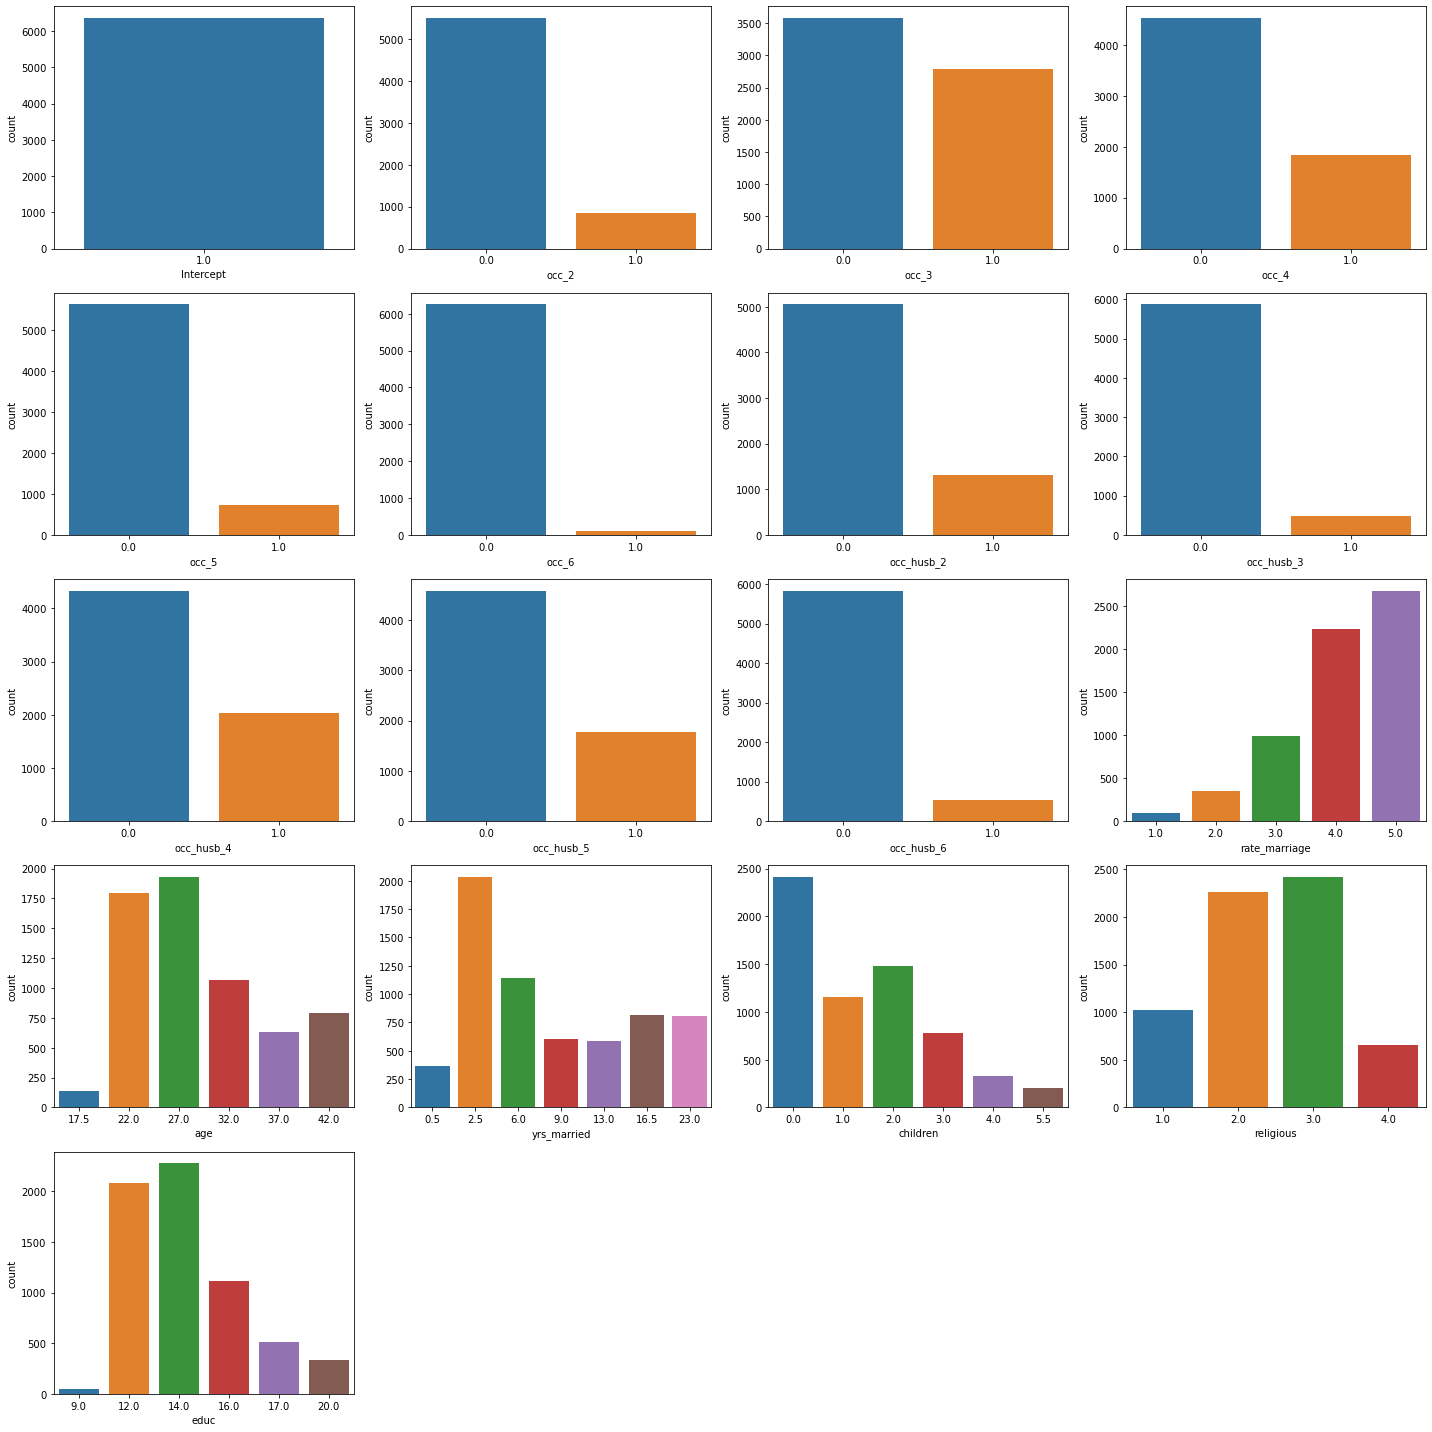

In [22]:
plt.figure(figsize=(20,20),facecolor='White')

number = 1
for i in X.columns:
    if number<=17:
        ax = plt.subplot(5,4,number)
        sns.countplot(X[i])
    number+=1
plt.tight_layout()

#### Analysis:

- From the above analysis, many women seems to be in white collar jobs followed by the second highest in skilled jobs such as teacher or nurse or writer or technician.
- First highest occuapation of husband's job is in skilled jobs such as teacher or nurse or writer or technician and followed by second highest in mangerial or business
- Many womens rated their marriage as very good which is the highest among all rating.
- In the survey, maximum women comes under the age of 27
- The highest in the number of years married is 2.5 yrs
- Highest count are those with no children
- Many womens seems to be relegious followed by moderately relegious
- Education of many women has some college or high school.

In [ ]:
## relationship of target variable with independent features

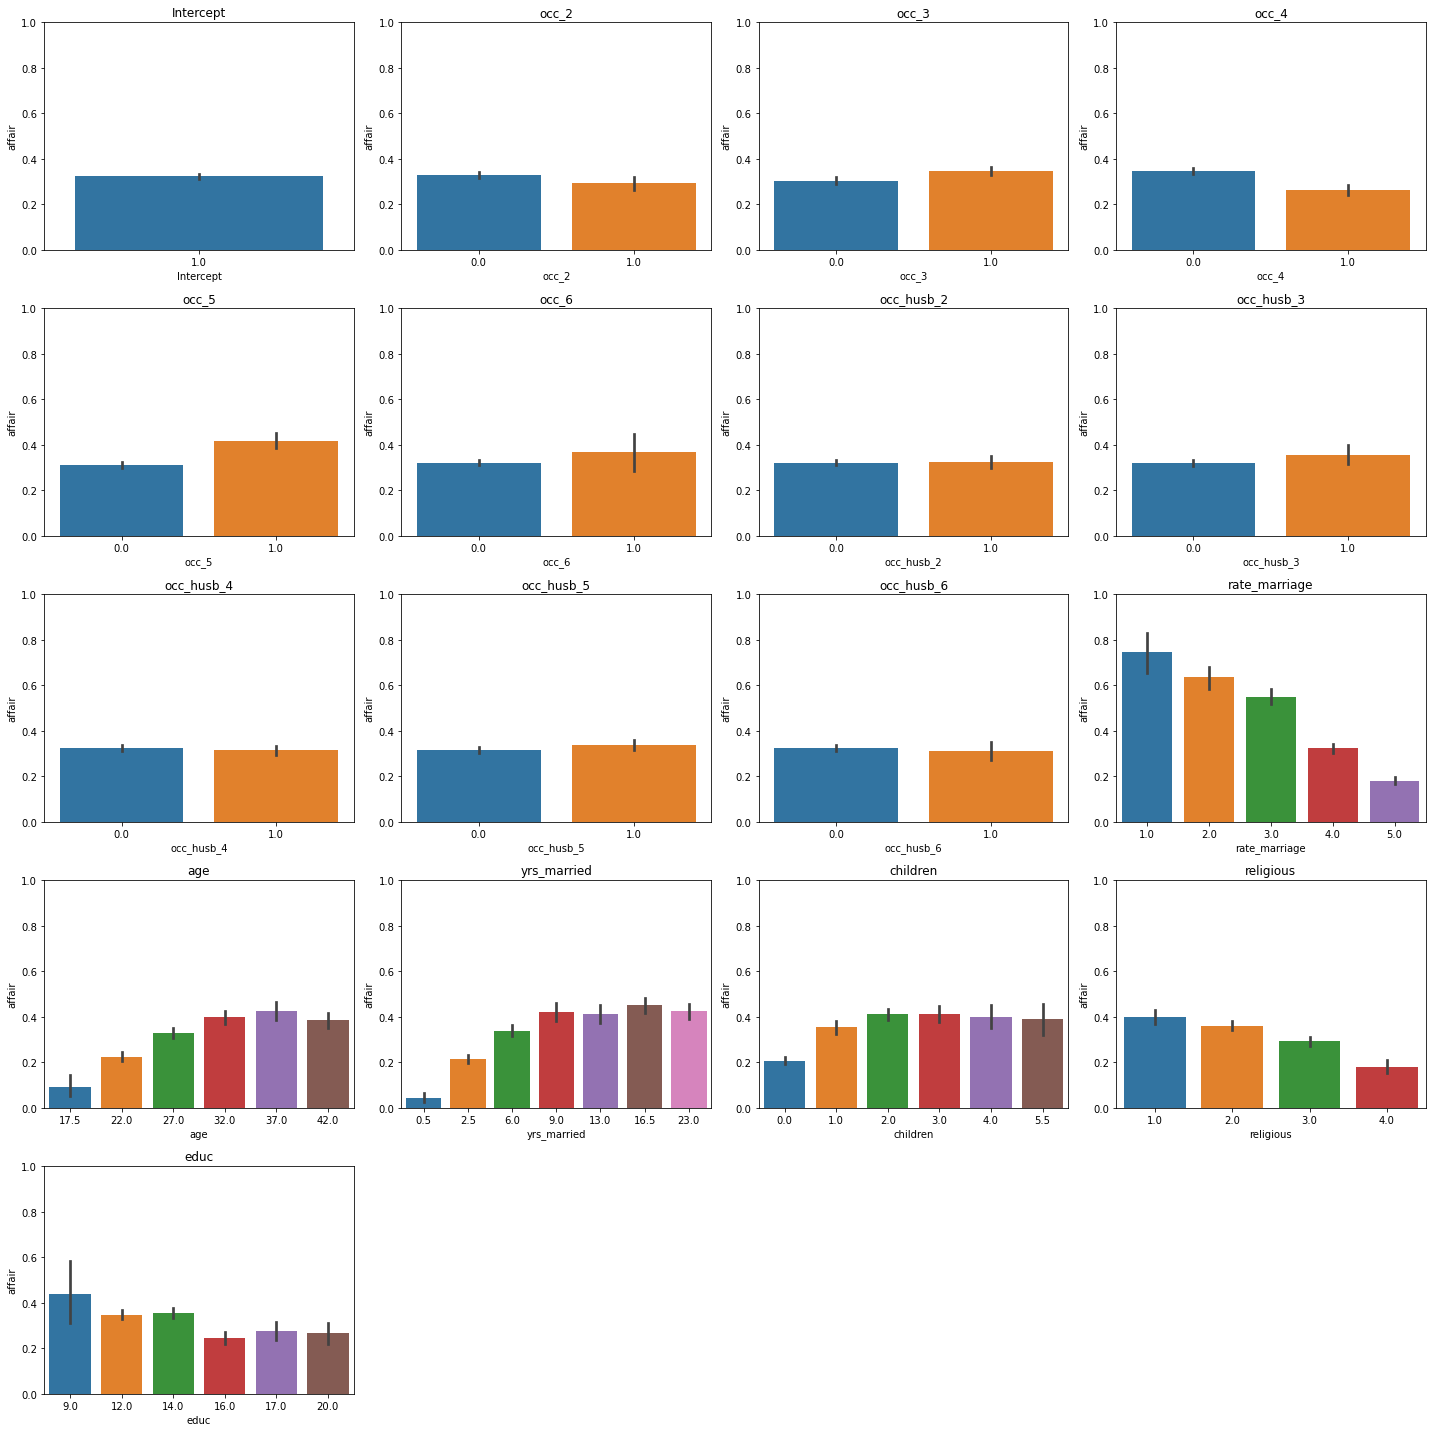

In [23]:
plt.figure(figsize=(20,20),facecolor='White')

number = 1
for i in X.columns:
    if number<=17:
        ax = plt.subplot(5,4,number)
        sns.barplot(X[i],y)
        ax.set_ylim(0,1)
        plt.xlabel(i)
        plt.ylabel('affair')
        plt.title(i)
    number+=1
plt.tight_layout()

### Analysis:

- Women who rated their marriage as very poor are more likely to be in affair
- Women in the age of 32 and 37 yrs are more likely to have affair
- Women with more than 9 yrs of marriage are in affair
- Women with more than 2 children are in affairs
- Women who are not relegious seems to be involved in affair
- Women who complted only grade school seems to be more in affair

<AxesSubplot:xlabel='children'>

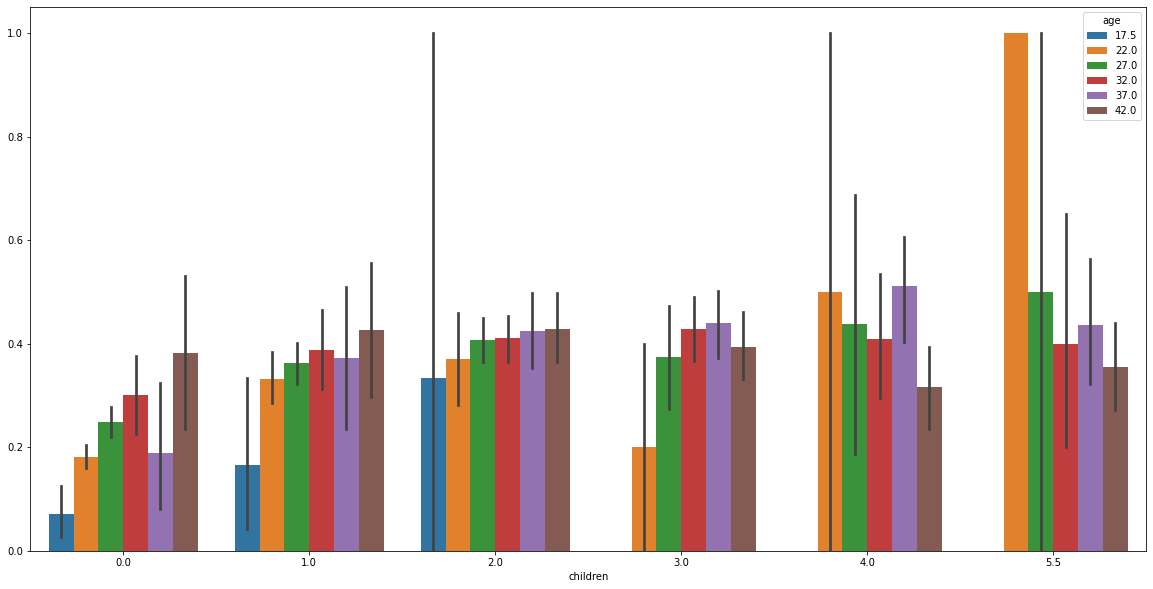

In [32]:
plt.figure(figsize=(20,10),facecolor='White')
sns.barplot(X['children'],y,hue=X['age'])

#### Analysis:

The women in the age of 22 years with 5 children seems to be more involved in affair.

<AxesSubplot:xlabel='children'>

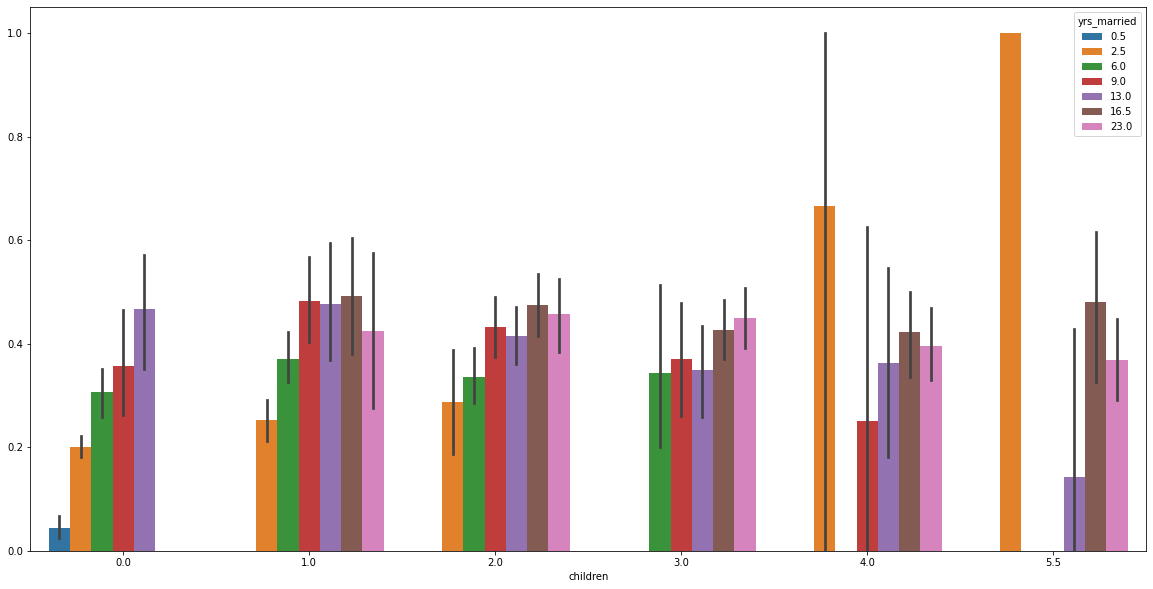

In [34]:
plt.figure(figsize=(20,10),facecolor='White')
sns.barplot(X['children'],y,hue=X['yrs_married'])

### Analysis:

- Women with more than 4 childrens in 2.5 yrs of marriage seems to be more involved in affair.
- Women with 2.5 yrs of marriage with less than 3 children are less likely to be involved in affairs.
- Women with 16.5 yrs of marriage with more than 1 children is seems to be involved in affair.

<AxesSubplot:xlabel='age', ylabel='yrs_married'>

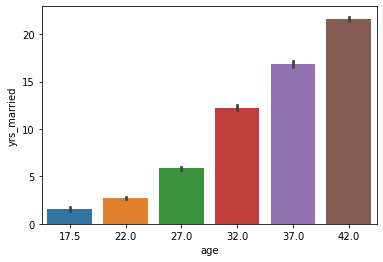

In [49]:
sns.barplot(X['age'],X['yrs_married'])

<AxesSubplot:xlabel='age', ylabel='children'>

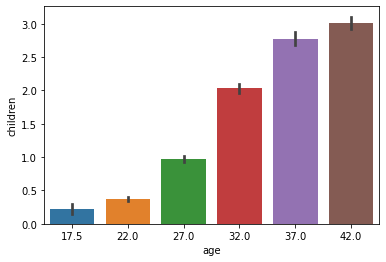

In [50]:
sns.barplot(X['age'],X['children'])

<AxesSubplot:xlabel='yrs_married', ylabel='children'>

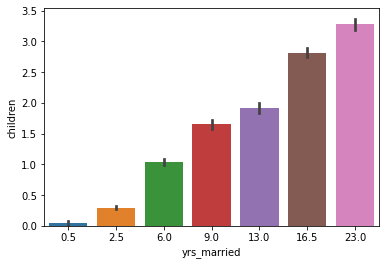

In [51]:
sns.barplot(X['yrs_married'],X['children'])

### Analysis:

- Age of women increases with years married
- Number of children increases with age
- No of children increases with years married

<AxesSubplot:xlabel='age'>

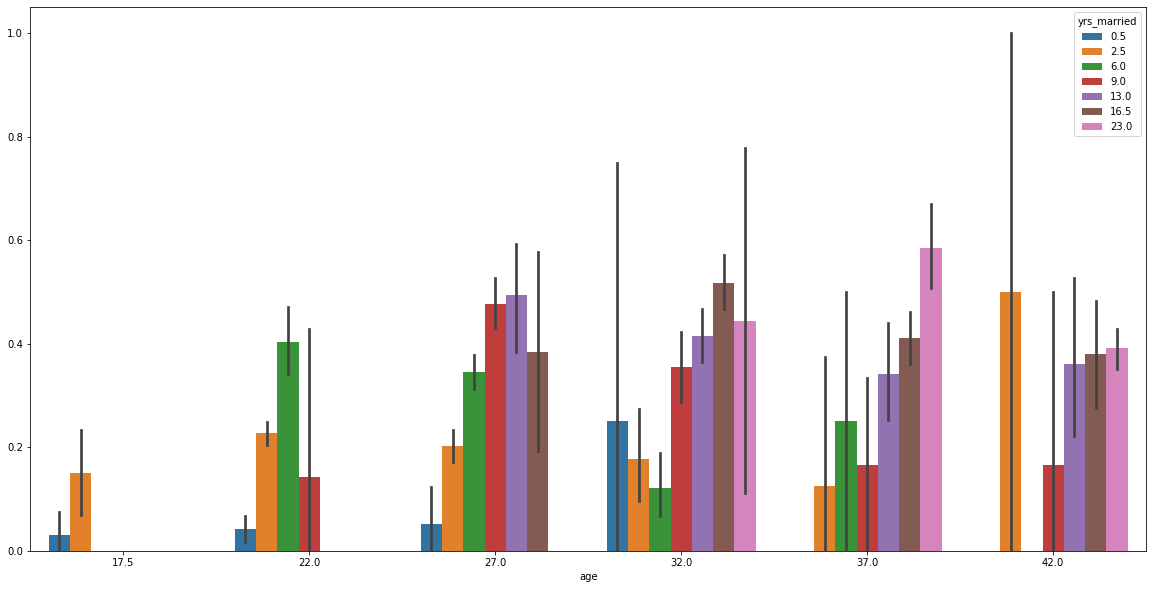

In [48]:
plt.figure(figsize=(20,10),facecolor='White')
sns.barplot(X['age'],y,hue=X['yrs_married'])

### Analysis:

- As age increases the number of years of mariage increases.
- As we have previously analysed women in the age of 27 and 32 years are nore likely to have in affair, as we can see that because these women were married in their teen age.
- Women in age of 37, with 23 years of marriage was married at the age of 14 years , these women seemsto be in affairs. 

(0.0, 1.0)

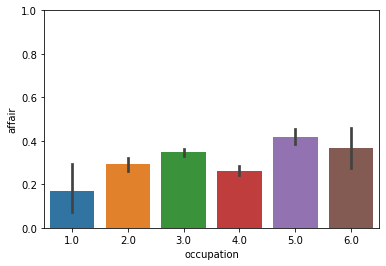

In [37]:
sns.barplot(dta['occupation'],dta['affair']).set_ylim(0,1)

### Analysis:

Women in the occupation of manger/business field more likely to be involved in affair compared to other occupation.

(0.0, 1.0)

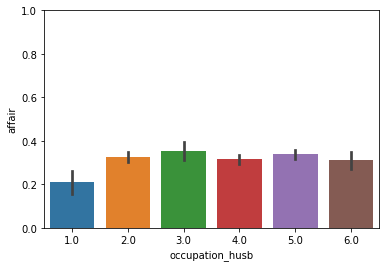

In [38]:
sns.barplot(dta['occupation_husb'],dta['affair']).set_ylim(0,1)

### Analysis:

- Women whose husband's is in the occupation of white collar jobs seems to be more involved in affair compared to other husband's occupation.

<AxesSubplot:>

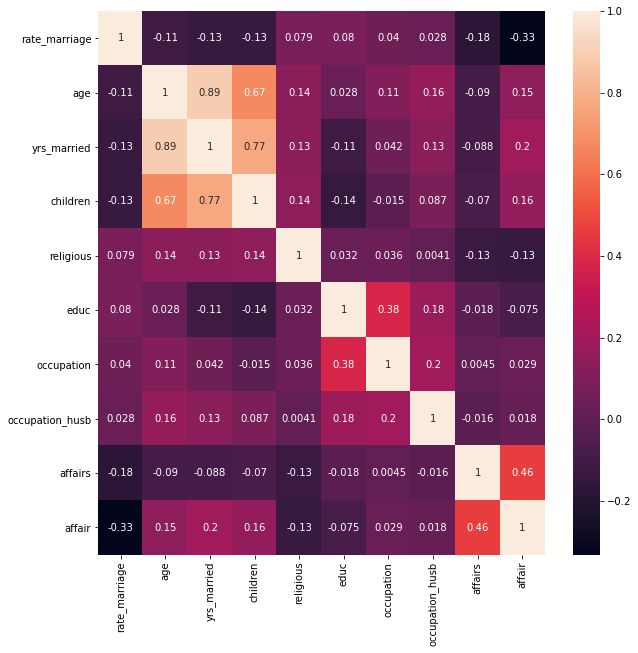

In [44]:
plt.figure(figsize=(10,10))
corr = dta.corr()
sns.heatmap(corr,annot=True)

### Analysis

- Age and yrs_married are positively correlated with 0.89
- Age and children are positively correlated with 0.67
- yrs_married and children are positively correlated with 0.77
- rate_marriage and affair is negattively correlated with -0.33
- religious and affair is negatively correlated with -0.13

<AxesSubplot:>

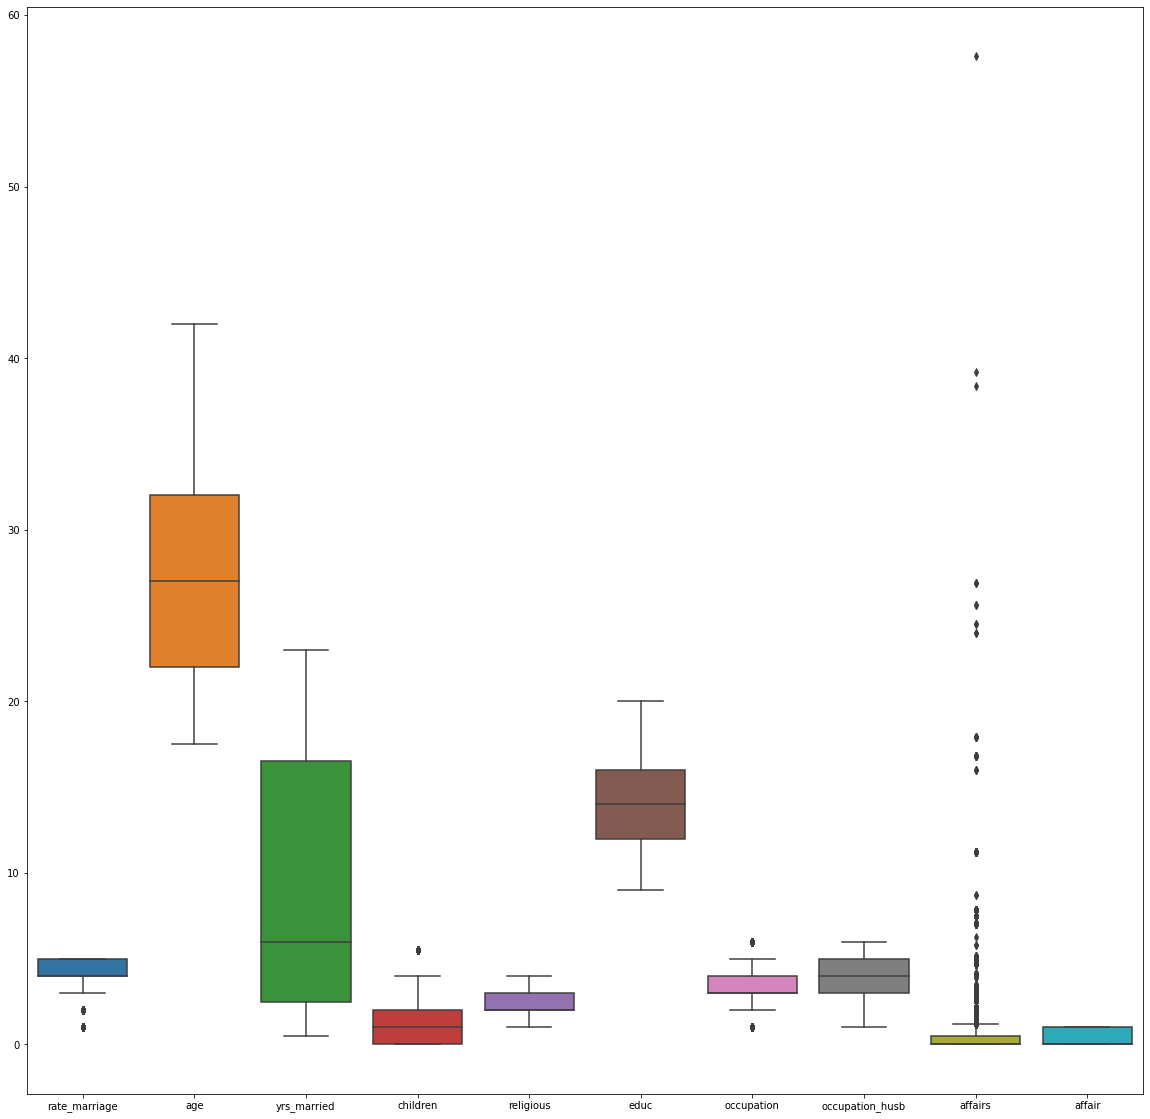

In [56]:
plt.figure(figsize=(20,20))
sns.boxplot(data = dta)

### Analysis

There is not much outliers , hence need not to take care of it.

In [19]:
std_scalar = StandardScaler()
X_scaled = std_scalar.fit_transform(X)

<AxesSubplot:>

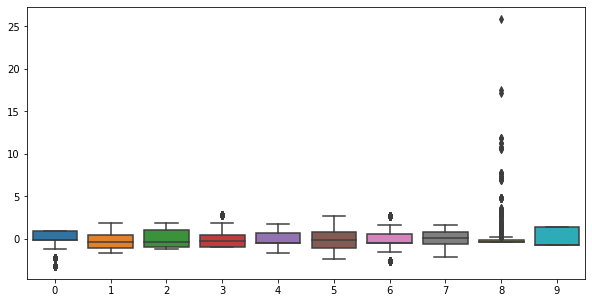

In [20]:
dta_scaled = pd.DataFrame(std_scalar.fit_transform(dta))
plt.figure(figsize=(10,5))
sns.boxplot(data = dta_scaled)

<AxesSubplot:>

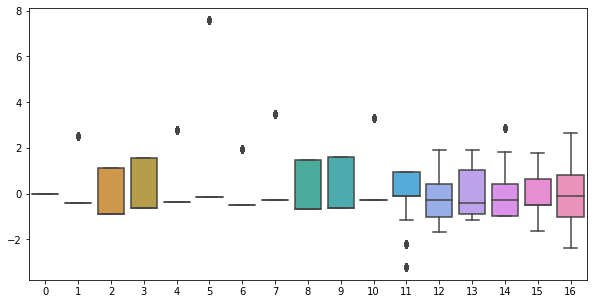

In [21]:
X_df_scaled = pd.DataFrame(X_scaled)
plt.figure(figsize=(10,5))
sns.boxplot(data = X_df_scaled)

In [22]:
X_df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,2.531984,-0.881319,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,0.0,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361,0.0,-0.394947,-0.881319,1.571974,-0.362674,-0.131987,-0.508528,3.462923,-0.684232,-0.622764,-0.301356,0.926147,0.426025,0.548190,0.420778,0.653341,1.281153
6362,0.0,-0.394947,-0.881319,-0.636143,2.757300,-0.131987,-0.508528,-0.288773,-0.684232,1.605744,-0.301356,-0.114053,0.426025,0.548190,-0.276884,-1.623785,0.821981
6363,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,-0.684232,-0.622764,-0.301356,0.926147,-1.034396,-0.894207,-0.974546,-0.485222,-0.096364
6364,0.0,-0.394947,1.134663,-0.636143,-0.362674,-0.131987,-0.508528,-0.288773,1.461493,-0.622764,-0.301356,0.926147,0.426025,-0.413408,-0.276884,0.653341,-0.096364


In [23]:
variables = X_scaled
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]

In [24]:
vif

,Features,VIF
0,Intercept,NaN
1,occ_2,19.340780
2,occ_3,39.335618
3,occ_4,32.931910
4,occ_5,17.057165
5,occ_6,3.697959
6,occ_husb_2,5.566292
7,occ_husb_3,2.991070
8,occ_husb_4,6.930281
9,occ_husb_5,6.577077


In [33]:
X_pca = X.drop('Intercept',axis=1)
X_pca.head()

,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [83]:
X_pca.shape

(6366, 16)

In [48]:
x_pca_1half= X_pca[['occ_2','occ_3','occ_4','occ_5','occ_6']]
x_pca_2half= X_pca[['occ_husb_2','occ_husb_3','occ_husb_4','occ_husb_5','occ_husb_6']]
x_pca_remaing = X_pca[['rate_marriage','age','yrs_married','children','religious','educ']]

In [49]:
X1half_scaled_pca = std_scalar.fit_transform(x_pca_1half)
X2half_scaled_pca = std_scalar.fit_transform(x_pca_2half)
X2remaing_scaled_pca = std_scalar.fit_transform(x_pca_remaing)

In [50]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=1)

In [52]:
pca.fit(X1half_scaled_pca)
pca.fit(X2half_scaled_pca)

PCA(n_components=1)

In [53]:
X1_pca = pca.transform(X1half_scaled_pca)
X2_pca = pca.transform(X2half_scaled_pca)

In [81]:
X1_pca,X2_pca

(array([[-0.5407569],
        [-0.241684 ],
        [-0.241684 ],
        ...,
        [-0.241684 ],
        [-0.241684 ],
        [-0.5407569]]),
 array([[-1.45022984],
        [ 1.59471995],
        [-1.45022984],
        ...,
        [-0.04267314],
        [ 1.59471995],
        [ 1.59471995]]))

In [65]:
## to convert to one single array
final_array = np.column_stack((X1_pca,X2_pca,X2remaing_scaled_pca))
final_array[0]

array([-5.40756899e-01, -1.45022984e+00, -1.15425213e+00,  4.26024735e-01,
       -1.29473293e-03,  1.11844056e+00,  6.53341477e-01,  1.28115287e+00])

In [78]:
Women_occu = pd.DataFrame(X1_pca,columns=['women_occupation'])
husband_occu = pd.DataFrame(X2_pca,columns=['husband_occupation'])
remaing = pd.DataFrame(X2remaing_scaled_pca,columns=['rate_marriage','age','yrs_married','children','religious','educ'])

In [82]:
final_df1 = pd.concat([Women_occu,husband_occu],axis=1)
final_df1.shape

(6366, 2)

In [85]:
final_df = pd.concat([final_df1,remaing],axis=1)
final_df.shape

(6366, 8)

In [94]:
final_df.head()

,women_occupation,husband_occupation,rate_marriage,age,yrs_married,children,religious,educ
0,-0.540757,-1.45023,-1.154252,0.426025,-0.001295,1.118441,0.653341,1.281153
1,-0.241684,1.59472,-1.154252,-0.304185,0.548190,1.118441,-1.623785,-0.096364
2,-0.241684,-1.45023,-0.114053,-1.034396,-0.894207,-0.974546,-1.623785,0.821981
3,-2.140610,-1.45023,-0.114053,1.156235,1.028989,1.816103,0.653341,0.821981
4,-0.241684,1.59472,0.926147,-0.304185,-0.001295,-0.276884,-1.623785,-0.096364


In [86]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(final_df,y,test_size=0.20,random_state=1)

In [87]:
log_reg_pca = LogisticRegression(verbose=1)
log_reg_pca.fit(X_train_pca,y_train_pca)
y_pred_pca = log_reg_pca.predict(X_test_pca)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [88]:
metrics.accuracy_score(y_test_pca,y_pred_pca)

0.7323390894819466

In [89]:
log_reg_gs_pca = LogisticRegression(C=0.1,penalty='none',solver='saga',verbose=1)
log_reg_gs_pca.fit(X_train_pca,y_train_pca)
y_pred_gs_pca = log_reg_gs_pca.predict(X_test_pca)

convergence after 17 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [90]:
metrics.accuracy_score(y_test_pca,y_pred_pca)

0.7323390894819466

In [91]:
log_reg_rs_pca = LogisticRegression(solver='saga',penalty='l2',C=100.501,n_jobs=-1,verbose=1)
log_reg_rs_pca.fit(X_train_pca,y_train_pca)
y_pred_rs_pca = log_reg_rs_pca.predict(X_test_pca)

convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [92]:
metrics.accuracy_score(y_test_pca,y_pred_pca)

0.7323390894819466

In [95]:
filename = 'logistic_regression.pickle'
pickle.dump(log_reg_rs_pca,open(filename,'wb'))

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.20,random_state=1)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5092, 17)
(1274, 17)
(5092,)
(1274,)


In [28]:
X_train[0]

array([ 0.        , -0.3949472 ,  1.13466276, -0.63614294, -0.36267364,
       -0.1319867 ,  1.96646192, -0.28877337, -0.684232  , -0.62276415,
       -0.30135631,  0.92614681, -0.3041854 , -0.8942073 , -0.97454634,
        0.65334148, -0.09636416])

In [29]:
log_reg = LogisticRegression(verbose=1)
log_reg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [30]:
y_pred = log_reg.predict(X_test)
y_pred

array([1., 1., 0., ..., 1., 1., 0.])

In [31]:
prob = log_reg.predict_proba(X_test)
prob

array([[0.42503402, 0.57496598],
       [0.43712212, 0.56287788],
       [0.60821152, 0.39178848],
       ...,
       [0.21792041, 0.78207959],
       [0.24776661, 0.75223339],
       [0.76550507, 0.23449493]])

In [32]:
metrics.accuracy_score(y_test,y_pred)

0.7401883830455259

In [33]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[782,  90],
       [241, 161]], dtype=int64)

In [34]:
precision = metrics.precision_score(y_test,y_pred)
precision

0.6414342629482072

In [35]:
recall = metrics.recall_score(y_test,y_pred)
recall

0.40049751243781095

In [36]:
F1_score = metrics.f1_score(y_test,y_pred)
F1_score

0.49310872894333846

In [37]:
auc = metrics.roc_auc_score(y_test,y_pred)
auc

0.6486432516317495

In [38]:
log_prob = prob[:,1]
log_prob

array([0.57496598, 0.56287788, 0.39178848, ..., 0.78207959, 0.75223339,
       0.23449493])

In [39]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,log_prob)

In [40]:
len(thresholds)

536

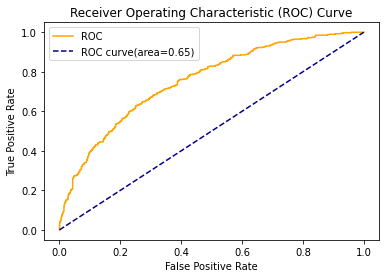

In [41]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area=%0.2f)'%auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Hyperparameter tuning

In [70]:
param_grid = {'penalty':['l1','l2','elasticnet'],
             'C': np.logspace(-4,4,25),
             'solver':['newton-cg','liblinear','lbfgs','sag','saga']}

In [69]:
log_reg_gscv = GridSearchCV(log_reg,param_grid,cv=10,n_jobs=-1,verbose=1)

In [70]:
log_reg_gscv.fit(X_train,y_train)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:    9.2s


convergence after 16 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed:   26.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


GridSearchCV(cv=10, estimator=LogisticRegression(verbose=1), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             verbose=1)

In [71]:
log_reg_gscv.best_params_  ## accuracy is only 73 % with penalty:l1 compared to none with 74%

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [72]:
log_reg_gs = LogisticRegression(C=0.1,penalty='none',solver='saga',verbose=1)

In [73]:
log_reg_gs.fit(X_train,y_train)

convergence after 49 epochs took 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.1, penalty='none', solver='saga', verbose=1)

In [74]:
y_pred_gs = log_reg_gs.predict(X_test)
y_pred_gs

array([1., 1., 0., ..., 1., 1., 0.])

In [75]:
metrics.accuracy_score(y_test,y_pred_gs)

0.7401883830455259

In [76]:
metrics.precision_score(y_test,y_pred_gs)

0.6414342629482072

In [77]:
metrics.recall_score(y_test,y_pred_gs)

0.40049751243781095

In [78]:
metrics.f1_score(y_test,y_pred_gs)

0.49310872894333846

In [79]:
log_reg_rscv = RandomizedSearchCV(log_reg,param_grid,cv=15,n_jobs=-1,verbose=1)

In [80]:
log_reg_rscv.fit(X_train,y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.7s


convergence after 23 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


RandomizedSearchCV(cv=15, estimator=LogisticRegression(verbose=1), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'lbfgs', 'sag', 'saga']},
                   verbose=1)

In [81]:
log_reg_rscv.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.1}

In [238]:
log_reg_rs = LogisticRegression(solver='saga',penalty='l2',C=100.501,n_jobs=-1,verbose=1)

In [239]:
log_reg_rs.fit(X_train,y_train)

convergence after 49 epochs took 0 seconds


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=100.501, n_jobs=-1, solver='saga', verbose=1)

In [240]:
y_predict_rs = log_reg_rs.predict(X_test)
y_predict_rs

array([1., 1., 0., ..., 1., 1., 0.])

In [241]:
metrics.accuracy_score(y_test,y_predict_rs)

0.7401883830455259

In [247]:
metrics.precision_score(y_test,y_predict_rs)

0.6414342629482072

In [248]:
metrics.recall_score(y_test,y_predict_rs)

0.40049751243781095

In [249]:
metrics.f1_score(y_test,y_predict_rs)

0.49310872894333846

In [252]:
## saving the model in local file system
filename = 'logistic_regression.pickle'
pickle.dump(log_reg_rs,open(filename,'wb'))

In [255]:
data_dta = dta.drop('affairs',axis=1)
data_dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [257]:
y_dta = data_dta['affair']
X_dta = data_dta.drop('affair',axis=1)

In [260]:
X_dta_scaled = std_scalar.fit_transform(X_dta)
X_dta_scaled

array([[-1.15425213e+00,  4.26024735e-01, -1.29473293e-03, ...,
         1.28115287e+00, -1.51129246e+00,  8.54069123e-01],
       [-1.15425213e+00, -3.04185400e-01,  5.48189921e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -4.50087100e-01,  8.54069123e-01],
       ...,
       [ 9.26146808e-01, -1.03439554e+00, -8.94207296e-01, ...,
        -9.63641611e-02, -4.50087100e-01, -2.11697133e+00],
       [ 9.26146808e-01,  4.26024735e-01, -4.13408224e-01, ...,
        -9.63641611e-02, -4.50087100e-01,  1.11309009e-01],
       [-1.14052659e-01, -1.03439554e+00, -8.94207296e-01, ...,
         8.21980524e-01, -1.51129246e+00,  1.11309009e-01]])

In [261]:
X_train_dta,X_test_dta,y_train_dta,y_test_dta = train_test_split(X_dta_scaled,y_dta,test_size=0.20,random_state=1)

In [262]:
log_reg_dta = LogisticRegression()
log_reg_dta.fit(X_train_dta,y_train_dta)

LogisticRegression()

In [265]:
y_pred_dta = log_reg_dta.predict(X_test_dta)
y_pred_dta

array([1, 1, 0, ..., 1, 1, 0])

In [266]:
metrics.accuracy_score(y_test_dta,y_pred_dta)

0.7323390894819466

In [267]:
metrics.precision_score(y_test_dta,y_pred_dta)

0.6244897959183674

In [268]:
metrics.recall_score(y_test_dta,y_pred_dta)

0.3805970149253731

In [269]:
metrics.f1_score(y_test_dta,y_pred_dta)

0.47295208655332305

In [ ]:
param_grid = {'penalty':['l1','l2','elasticnet'],
             'C': np.logspace(-4,4,25),
             'solver':['newton-cg','liblinear','lbfgs','sag','saga']}

In [270]:
logreg_gscv_dta = GridSearchCV(log_reg_dta,param_grid,verbose=1,n_jobs=-1,cv=10)

In [271]:
logreg_gscv_dta.fit(X_train_dta,y_train_dta)

Fitting 10 folds for each of 375 candidates, totalling 3750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 3750 out of 3750 | elapsed:   12.4s finished


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'liblinear', 'lbfgs', 'sag',
                                    'saga']},
             verbose=1)

In [272]:
logreg_gscv_dta.best_params_

{'C': 0.46415888336127775, 'penalty': 'l1', 'solver': 'liblinear'}

In [273]:
logreg_gs_dta = LogisticRegression(C= 0.46415888336127775,penalty= 'l1',solver= 'liblinear',n_jobs=-1)

In [274]:
logreg_gs_dta.fit(X_train_dta,y_train_dta)

LogisticRegression(C=0.46415888336127775, n_jobs=-1, penalty='l1',
                   solver='liblinear')

In [277]:
y_pred_gs_dta = logreg_gs_dta.predict(X_test_dta)
y_pred_gs_dta

array([1, 1, 0, ..., 1, 1, 0])

In [278]:
metrics.accuracy_score(y_test_dta,y_pred_gs_dta)

0.7315541601255887

In [279]:
logreg_rscv_dta = RandomizedSearchCV(log_reg_dta,param_grid,verbose=1,n_jobs=-1)

In [280]:
logreg_rscv_dta.fit(X_train_dta,y_train_dta)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomizedSearchCV(estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': array([1.00000000e-04, 2.15443469e-04, 4.64158883e-04, 1.00000000e-03,
       2.15443469e-03, 4.64158883e-03, 1.00000000e-02, 2.15443469e-02,
       4.64158883e-02, 1.00000000e-01, 2.15443469e-01, 4.64158883e-01,
       1.00000000e+00, 2.15443469e+00, 4.64158883e+00, 1.00000000e+01,
       2.15443469e+01, 4.64158883e+01, 1.00000000e+02, 2.15443469e+02,
       4.64158883e+02, 1.00000000e+03, 2.15443469e+03, 4.64158883e+03,
       1.00000000e+04]),
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'liblinear',
                                                   'lbfgs', 'sag', 'saga']},
                   verbose=1)

In [281]:
logreg_rscv_dta.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 464.1588833612773}

In [283]:
logreg_rs_dta = LogisticRegression(solver='lbfgs',penalty='l2',C = 464.1588833612773,verbose=1,n_jobs=-1)

In [284]:
logreg_rs_dta.fit(X_train_dta,y_train_dta)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=464.1588833612773, n_jobs=-1, verbose=1)

In [286]:
y_pred_rs_dta = logreg_rs_dta.predict(X_test_dta)
y_pred_rs_dta

array([1, 1, 0, ..., 1, 1, 0])

In [287]:
metrics.accuracy_score(y_test_dta,y_pred_rs_dta)

0.7339089481946625